# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## White Noise

### Definition

[White noise](https://en.wikipedia.org/wiki/White_noise) is a random signal with a constant power spectral density (PSD). White noise draws its name from the analogy to white light. It refers typically to a model of random signals, like e.g. measurement noise. For a zero-mean random signal $x[k]$, its PSD reads

$$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = N_0 $$

where $N_0$ denotes the power per frequency. The auto-correlation function of white noise can be derived by inverse discrete-time Fourier transformation (DTFT) of the PSD

$$ \varphi_{xx}[\kappa] = \mathcal{F}_* \{ N_0 \} = N_0 \; \delta[\kappa] $$

Hence, neighboring samples $k$ and $k+1$ are uncorrelated and have no statistical dependencies. The probability density function (PDF) of white noise is not necessarily normally distributed. Hence, it is necessary to additionally state the amplitude distribution when classifying a signal as white noise.

### Example

Toolboxes for numerical mathematics like `Numpy` or `scipy.stats` provide functions to draw random uncorrelated samples from various PDFs. In order to evaluate this, a function is defined to compute and plot the PDF and CDF for a given random signal $x[k]$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def compute_plot_pdf_acf(x, nbins=50, acf_range=30):
    
    # compute and truncate ACF
    acf = 1/len(x) * np.correlate(x, x, mode='full')
    acf = acf[len(x)-acf_range-1:len(x)+acf_range-1]
    kappa = np.arange(-acf_range, acf_range)
    
    # plot PSD
    plt.figure(figsize = (10, 6))
    plt.subplot(121)
    plt.hist(x, nbins, normed=True)
    plt.title('Estimated PDF')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$\hat{p}_x(\theta)$')

    # plot ACF
    plt.subplot(122)
    plt.stem(kappa, acf)
    plt.title('Estimated ACF')
    plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')
    plt.xlabel(r'$\kappa$')
    plt.axis([-acf_range, acf_range, 0, 1.1*max(acf)]);
    plt.grid()

For samples drawn from a zero-mean uniform distribution the PDF and ACF are estimated as

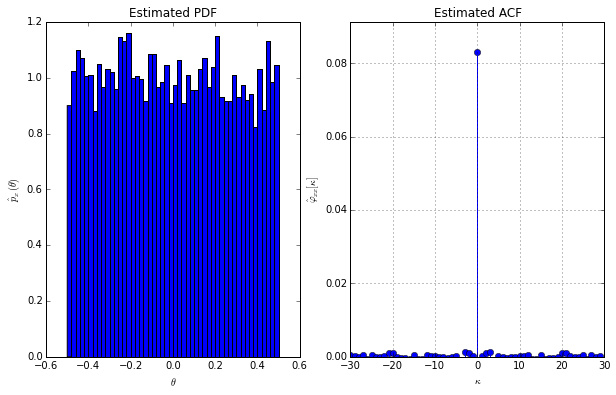

In [2]:
compute_plot_pdf_acf(np.random.uniform(size=10000)-1/2)

For samples drawn from a zero-mean Laplace distribution the PDF and ACF are estimated as

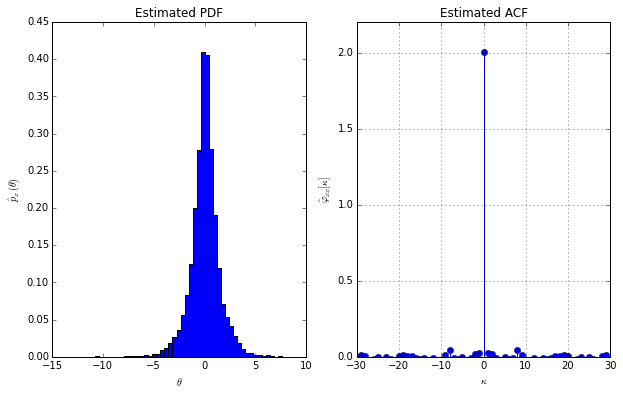

In [3]:
compute_plot_pdf_acf(np.random.laplace(size=10000))

**Exercise**

* Do both random processes represent white noise?
* How does the ACF change if you lower the length `size` of the random signal. Why?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>